In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('out.csv')
df_y = df.truncate()
df_ = df.drop(columns=['Day1_Hs', 'Day1_D','Day2_Hs', 'Day2_D','Day3_Hs', 'Day3_D'])
df_train = df_.truncate()
# df_train
# df_train.head()
X_train = df_train.to_numpy()[:-1100]
X_test = df_train.to_numpy()[-1100:]
print(len(df_train.to_numpy()))
print(len(X_train))
print(len(X_test))

X_test[0]

5386
4286
1100


array([1, 2, 0, 0, 1, 0, 1, 2, 0])

In [10]:


# Data-Labeling Procedure

def sleep_score(a):
    if a < 7: return -2
    if a ==7: return -1
    if a == 8: return 1
    if a == 9: return 1
    if a == 10: return 1
    if a == 11: return -1
    if a > 11: return -2

def delay_score(a):
    if a > 2: return -2
    if a == 2: return -1
    if a == 1 or a == 0 or a == -1 : return 0
    if a == -2: return -1
    if a < -2: return -2
    
sc_weight = 2
ev_weight = 1
sl_weight = 3
social_r = -0.05
edu_r = 0.22
game_r = -0.2
max_score = 3
min_score =  -12

df_label = pd.DataFrame(columns = ["Day1_Hs","Day1_D","Day2_Hs","Day2_D","Day3_Hs","Day3_D", "Score"]
                     ,index=[0])

for idx, row in df_y.iterrows():
#     print(row['Sc_Game'])
#     print(period_score(row['Sc_Game']))
    score = []

    score.append(sleep_score(row['Day1_Hs']))
    score.append(delay_score(row['Day1_D']))
    score.append(sleep_score(row['Day2_Hs']))
    score.append(delay_score(row['Day2_D']))
    score.append(sleep_score(row['Day3_Hs']))
    score.append(delay_score(row['Day3_D']))
    wellbeing_score = ((sum(score) - min_score)*10)/(max_score - min_score)
    score.append(wellbeing_score)
    df_label.loc[df_label.index.max()+1] = score

df_label = df_label.drop([0])
# Y = df_label['Score'].to_numpy()

Y_train = df_label['Score'].to_numpy()[:-1100]
Y_test = df_label['Score'].to_numpy()[-1100:]
print(len(df_label['Score'].to_numpy()))
print(len(Y_train))
print(len(Y_test))
Y_test

5386
4286
1100


array([5.33333333, 8.        , 6.        , ..., 2.        , 1.33333333,
       1.33333333])

<class 'pandas.core.series.Series'>


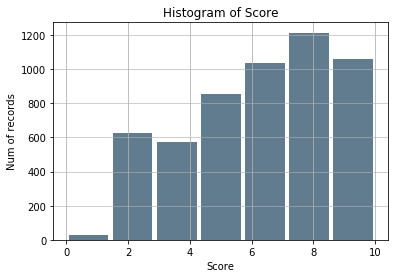

In [11]:
x = df_label['Score']
print(type(x))
x.plot.hist(grid=True, bins=7, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of Score')
plt.xlabel('Score')
plt.ylabel('Num of records')
plt.grid(axis='y', alpha=0.75)

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

from tensorflow.keras import backend as K

def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


model = tf.keras.Sequential()
model.add(Dense(9, input_shape=(9,), activation = tf.math.square))

model.add(Dense(1))
model.compile(loss='mean_squared_error', metrics=['mean_squared_error',tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mean_absolute_error', r_square], optimizer='adam')
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
# print(model.summary())


# optimizer = tf.keras.optimizers.RMSprop(0.0099)
# model.fit(X,Y,epochs=1000, batch_size=200)

history = model.fit(X_train, Y_train, validation_split= 0.2, epochs=200, batch_size=30, callbacks=[earlystopping] )





Train on 3428 samples, validate on 858 samples
Epoch 1/200
3428/3428 [==============================] - 0s 70us/sample - loss: 36.8776 - mean_squared_error: 36.8776 - rmse: 6.0727 - mean_absolute_error: 5.0396 - r_square: -7.0764 - val_loss: 29.0692 - val_mean_squared_error: 29.0692 - val_rmse: 5.3916 - val_mean_absolute_error: 4.5134 - val_r_square: -4.4574
Epoch 2/200
3428/3428 [==============================] - 0s 37us/sample - loss: 23.9549 - mean_squared_error: 23.9549 - rmse: 4.8944 - mean_absolute_error: 4.0903 - r_square: -4.2531 - val_loss: 21.7557 - val_mean_squared_error: 21.7557 - val_rmse: 4.6643 - val_mean_absolute_error: 3.8507 - val_r_square: -2.9783
Epoch 3/200
3428/3428 [==============================] - 0s 38us/sample - loss: 19.9255 - mean_squared_error: 19.9255 - rmse: 4.4638 - mean_absolute_error: 3.7078 - r_square: -3.4926 - val_loss: 19.1256 - val_mean_squared_error: 19.1256 - val_rmse: 4.3733 - val_mean_absolute_error: 3.5956 - val_r_square: -2.5847
Epoch 4/200

3428/3428 [==============================] - 0s 35us/sample - loss: 5.3176 - mean_squared_error: 5.3176 - rmse: 2.3060 - mean_absolute_error: 1.8658 - r_square: -0.1259 - val_loss: 5.5578 - val_mean_squared_error: 5.5578 - val_rmse: 2.3575 - val_mean_absolute_error: 1.9259 - val_r_square: -0.0283
Epoch 28/200
3428/3428 [==============================] - 0s 36us/sample - loss: 5.1836 - mean_squared_error: 5.1836 - rmse: 2.2767 - mean_absolute_error: 1.8484 - r_square: -0.1084 - val_loss: 5.3857 - val_mean_squared_error: 5.3857 - val_rmse: 2.3207 - val_mean_absolute_error: 1.8853 - val_r_square: -0.0062
Epoch 29/200
3428/3428 [==============================] - 0s 35us/sample - loss: 5.1352 - mean_squared_error: 5.1352 - rmse: 2.2661 - mean_absolute_error: 1.8444 - r_square: -0.0858 - val_loss: 5.3215 - val_mean_squared_error: 5.3215 - val_rmse: 2.3068 - val_mean_absolute_error: 1.8895 - val_r_square: 0.0186
Epoch 30/200
3428/3428 [==============================] - 0s 36us/sample - loss: 

3428/3428 [==============================] - 0s 35us/sample - loss: 4.3580 - mean_squared_error: 4.3580 - rmse: 2.0876 - mean_absolute_error: 1.7177 - r_square: 0.0707 - val_loss: 4.8163 - val_mean_squared_error: 4.8163 - val_rmse: 2.1946 - val_mean_absolute_error: 1.7920 - val_r_square: 0.1067
Epoch 54/200
3428/3428 [==============================] - 0s 34us/sample - loss: 4.3343 - mean_squared_error: 4.3343 - rmse: 2.0819 - mean_absolute_error: 1.7152 - r_square: 0.0840 - val_loss: 4.6333 - val_mean_squared_error: 4.6333 - val_rmse: 2.1525 - val_mean_absolute_error: 1.7588 - val_r_square: 0.1503
Epoch 55/200
3428/3428 [==============================] - 0s 35us/sample - loss: 4.3274 - mean_squared_error: 4.3274 - rmse: 2.0802 - mean_absolute_error: 1.7123 - r_square: 0.0716 - val_loss: 4.7221 - val_mean_squared_error: 4.7221 - val_rmse: 2.1730 - val_mean_absolute_error: 1.7755 - val_r_square: 0.1077
Epoch 56/200
3428/3428 [==============================] - 0s 35us/sample - loss: 4.319

3428/3428 [==============================] - 0s 39us/sample - loss: 4.3133 - mean_squared_error: 4.3133 - rmse: 2.0769 - mean_absolute_error: 1.7075 - r_square: 0.0682 - val_loss: 4.5684 - val_mean_squared_error: 4.5684 - val_rmse: 2.1374 - val_mean_absolute_error: 1.7414 - val_r_square: 0.1690
Epoch 80/200
3428/3428 [==============================] - 0s 37us/sample - loss: 4.2896 - mean_squared_error: 4.2896 - rmse: 2.0711 - mean_absolute_error: 1.7066 - r_square: 0.0925 - val_loss: 4.5897 - val_mean_squared_error: 4.5897 - val_rmse: 2.1424 - val_mean_absolute_error: 1.7532 - val_r_square: 0.1492
Epoch 81/200
3428/3428 [==============================] - 0s 38us/sample - loss: 4.3026 - mean_squared_error: 4.3026 - rmse: 2.0743 - mean_absolute_error: 1.7107 - r_square: 0.0846 - val_loss: 4.6125 - val_mean_squared_error: 4.6125 - val_rmse: 2.1477 - val_mean_absolute_error: 1.7574 - val_r_square: 0.1141
Epoch 82/200
3428/3428 [==============================] - 0s 38us/sample - loss: 4.298

3428/3428 [==============================] - 0s 38us/sample - loss: 4.2592 - mean_squared_error: 4.2592 - rmse: 2.0638 - mean_absolute_error: 1.7017 - r_square: 0.0970 - val_loss: 4.6620 - val_mean_squared_error: 4.6620 - val_rmse: 2.1592 - val_mean_absolute_error: 1.7660 - val_r_square: 0.1334
Epoch 106/200
3428/3428 [==============================] - 0s 38us/sample - loss: 4.2768 - mean_squared_error: 4.2768 - rmse: 2.0680 - mean_absolute_error: 1.7023 - r_square: 0.0982 - val_loss: 4.6430 - val_mean_squared_error: 4.6430 - val_rmse: 2.1548 - val_mean_absolute_error: 1.7587 - val_r_square: 0.1266
Epoch 107/200
3428/3428 [==============================] - 0s 37us/sample - loss: 4.2903 - mean_squared_error: 4.2903 - rmse: 2.0713 - mean_absolute_error: 1.7030 - r_square: 0.0839 - val_loss: 4.6101 - val_mean_squared_error: 4.6101 - val_rmse: 2.1471 - val_mean_absolute_error: 1.7658 - val_r_square: 0.1466
Epoch 108/200
3428/3428 [==============================] - 0s 37us/sample - loss: 4.

3428/3428 [==============================] - 0s 34us/sample - loss: 4.2913 - mean_squared_error: 4.2913 - rmse: 2.0715 - mean_absolute_error: 1.7036 - r_square: 0.0954 - val_loss: 4.8633 - val_mean_squared_error: 4.8633 - val_rmse: 2.2053 - val_mean_absolute_error: 1.8090 - val_r_square: 0.0801
Epoch 132/200
3428/3428 [==============================] - 0s 35us/sample - loss: 4.2674 - mean_squared_error: 4.2674 - rmse: 2.0658 - mean_absolute_error: 1.7021 - r_square: 0.0802 - val_loss: 4.6331 - val_mean_squared_error: 4.6331 - val_rmse: 2.1525 - val_mean_absolute_error: 1.7667 - val_r_square: 0.1368
Epoch 133/200
3428/3428 [==============================] - 0s 35us/sample - loss: 4.2689 - mean_squared_error: 4.2689 - rmse: 2.0661 - mean_absolute_error: 1.6985 - r_square: 0.0902 - val_loss: 4.5988 - val_mean_squared_error: 4.5988 - val_rmse: 2.1445 - val_mean_absolute_error: 1.7560 - val_r_square: 0.1583
Epoch 134/200
3428/3428 [==============================] - 0s 35us/sample - loss: 4.

3428/3428 [==============================] - 0s 36us/sample - loss: 4.2696 - mean_squared_error: 4.2696 - rmse: 2.0663 - mean_absolute_error: 1.6996 - r_square: 0.0915 - val_loss: 4.6709 - val_mean_squared_error: 4.6709 - val_rmse: 2.1612 - val_mean_absolute_error: 1.7667 - val_r_square: 0.1210
Epoch 158/200
3428/3428 [==============================] - 0s 36us/sample - loss: 4.2511 - mean_squared_error: 4.2511 - rmse: 2.0618 - mean_absolute_error: 1.7001 - r_square: 0.0954 - val_loss: 4.5958 - val_mean_squared_error: 4.5958 - val_rmse: 2.1438 - val_mean_absolute_error: 1.7469 - val_r_square: 0.1587
Epoch 159/200
3428/3428 [==============================] - 0s 35us/sample - loss: 4.2324 - mean_squared_error: 4.2324 - rmse: 2.0573 - mean_absolute_error: 1.6919 - r_square: 0.1133 - val_loss: 4.6208 - val_mean_squared_error: 4.6208 - val_rmse: 2.1496 - val_mean_absolute_error: 1.7638 - val_r_square: 0.1463
Epoch 160/200
3428/3428 [==============================] - 0s 36us/sample - loss: 4.

3428/3428 [==============================] - 0s 35us/sample - loss: 4.2490 - mean_squared_error: 4.2490 - rmse: 2.0613 - mean_absolute_error: 1.7002 - r_square: 0.0908 - val_loss: 4.6511 - val_mean_squared_error: 4.6511 - val_rmse: 2.1566 - val_mean_absolute_error: 1.7599 - val_r_square: 0.1080
Epoch 184/200
3428/3428 [==============================] - 0s 35us/sample - loss: 4.2551 - mean_squared_error: 4.2551 - rmse: 2.0628 - mean_absolute_error: 1.6962 - r_square: 0.0942 - val_loss: 4.7962 - val_mean_squared_error: 4.7962 - val_rmse: 2.1900 - val_mean_absolute_error: 1.7898 - val_r_square: 0.1169
Epoch 185/200
3428/3428 [==============================] - 0s 35us/sample - loss: 4.2721 - mean_squared_error: 4.2721 - rmse: 2.0669 - mean_absolute_error: 1.7010 - r_square: 0.0954 - val_loss: 4.7447 - val_mean_squared_error: 4.7447 - val_rmse: 2.1782 - val_mean_absolute_error: 1.7850 - val_r_square: 0.1164
Epoch 186/200
3428/3428 [==============================] - 0s 35us/sample - loss: 4.

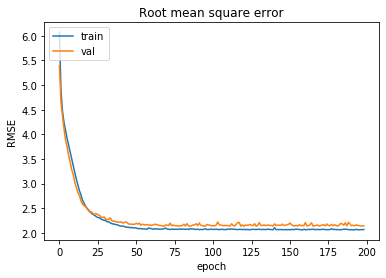

In [13]:

plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root mean square error')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


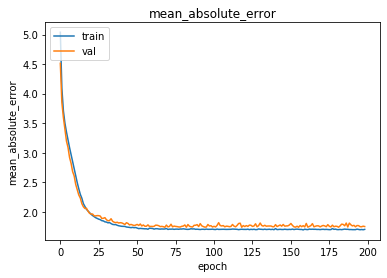

In [14]:

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


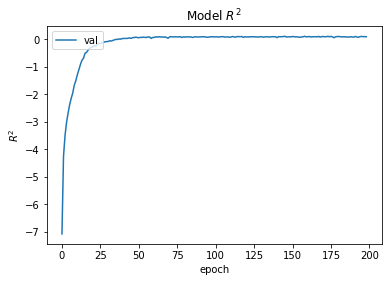

In [15]:
plt.plot(history.history['r_square'])
plt.title('Model $R^2$')
plt.ylabel('$R^2$')
plt.xlabel('epoch')
plt.legend(['val'], loc='upper left')
plt.show()

In [16]:
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=10)
print("test loss, test acc:", results)


Evaluate on test data
1100/1100 [==============================] - 0s 56us/sample - loss: 4.4525 - mean_squared_error: 4.4525 - rmse: 2.1101 - mean_absolute_error: 1.7371 - r_square: -3005434.2500
test loss, test acc: [4.452528914538297, 4.45253, 2.110102, 1.7370824, -3005434.2]


In [17]:
# i = 999
# j = 0
# while i < len(df.index):
#     j += 1 
#     _df_train = df_.truncate(before = i+1, after = i+100)
#     i += 100
#     _X = _df_train.to_numpy()
#     _Y = model.predict(_X)
#     X_train = np.concatenate((X_train, _X), axis=0)
#     Y_train = np.append(Y_train,_Y)
#     model.fit(X_train,Y_train, epochs=200, batch_size=20, callbacks=[earlystopping])
#     if j%3 == 0:
#         print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\
#               @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\
#               @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\
#               @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\
#               @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
#         results = model.evaluate(X_test, Y_test, batch_size=20)
#         print(results)

In [8]:
# print("Evaluate on test data")
# results = model.evaluate(X_test, Y_test, batch_size=10)
# print("test loss, test acc:", results)


Evaluate on test data
200/200 [==============================] - 0s 65us/sample - loss: 4.3275 - mean_squared_error: 4.3275 - rmse: 2.0803 - mean_absolute_error: 1.6605 - r_square: -0.9635
test loss, test acc: [4.327455842494965, 4.3274555, 2.0802536, 1.6604981, -0.96348655]


In [112]:
model.get_weights()

[array([[-2.36087590e-02, -5.20601034e-01,  3.79112303e-01,
          6.85166866e-02, -2.57370751e-02, -1.94074169e-01,
         -8.70853197e-03,  3.57228220e-01,  3.50797363e-02],
        [ 4.46248800e-02,  1.11133903e-01, -5.28463066e-01,
         -7.41788000e-02,  7.61075467e-02, -3.07507068e-01,
         -2.08253805e-02,  1.19817443e-01, -7.43552744e-02],
        [-2.23592725e-02, -2.75830179e-01, -2.02181607e-01,
         -3.18101980e-02, -4.65674043e-01, -1.54785335e-01,
         -7.97070004e-03, -7.04302788e-01, -3.54508519e-01],
        [-2.07305329e-05, -6.59517109e-01, -1.88920185e-01,
          1.94061212e-02,  2.11506918e-01, -4.03130263e-01,
          6.62487606e-03,  3.16875786e-01,  5.79200447e-01],
        [-2.57243309e-02,  3.01611751e-01,  4.58977133e-01,
          2.39977330e-01, -1.31074879e-02, -4.59236115e-01,
         -1.35173211e-02, -7.41272330e-01,  4.29468714e-02],
        [-5.93085289e-02,  3.11634302e-01,  2.74691582e-01,
          4.55129683e-01, -3.577470

In [113]:
a = np.array([[-2.36087590e-02, -5.20601034e-01,  3.79112303e-01,
          6.85166866e-02, -2.57370751e-02, -1.94074169e-01,
         -8.70853197e-03,  3.57228220e-01,  3.50797363e-02],
        [ 4.46248800e-02,  1.11133903e-01, -5.28463066e-01,
         -7.41788000e-02,  7.61075467e-02, -3.07507068e-01,
         -2.08253805e-02,  1.19817443e-01, -7.43552744e-02],
        [-2.23592725e-02, -2.75830179e-01, -2.02181607e-01,
         -3.18101980e-02, -4.65674043e-01, -1.54785335e-01,
         -7.97070004e-03, -7.04302788e-01, -3.54508519e-01],
        [-2.07305329e-05, -6.59517109e-01, -1.88920185e-01,
          1.94061212e-02,  2.11506918e-01, -4.03130263e-01,
          6.62487606e-03,  3.16875786e-01,  5.79200447e-01],
        [-2.57243309e-02,  3.01611751e-01,  4.58977133e-01,
          2.39977330e-01, -1.31074879e-02, -4.59236115e-01,
         -1.35173211e-02, -7.41272330e-01,  4.29468714e-02],
        [-5.93085289e-02,  3.11634302e-01,  2.74691582e-01,
          4.55129683e-01, -3.57747078e-01, -3.33878756e-01,
         -9.00138356e-03, -5.25740862e-01,  3.66750538e-01],
        [ 1.16910450e-02, -9.27691981e-02,  2.00206220e-01,
         -2.68541705e-02,  1.44670844e-01, -2.10818231e-01,
         -2.22847168e-03, -6.71090186e-02, -1.27368644e-01],
        [ 8.93315766e-03, -3.26891579e-02, -1.48632705e-01,
         -1.29274294e-01,  3.26632857e-01, -1.01819344e-01,
          1.71716306e-02, -1.72078133e-01, -1.70253590e-01],
        [-2.37425696e-02,  2.90112440e-02,  7.23632649e-02,
          4.08127874e-01, -1.93478480e-01, -2.93932587e-01,
          2.12160610e-02,  1.25051379e-01, -4.96561453e-02]])
a.T

array([[-2.36087590e-02,  4.46248800e-02, -2.23592725e-02,
        -2.07305329e-05, -2.57243309e-02, -5.93085289e-02,
         1.16910450e-02,  8.93315766e-03, -2.37425696e-02],
       [-5.20601034e-01,  1.11133903e-01, -2.75830179e-01,
        -6.59517109e-01,  3.01611751e-01,  3.11634302e-01,
        -9.27691981e-02, -3.26891579e-02,  2.90112440e-02],
       [ 3.79112303e-01, -5.28463066e-01, -2.02181607e-01,
        -1.88920185e-01,  4.58977133e-01,  2.74691582e-01,
         2.00206220e-01, -1.48632705e-01,  7.23632649e-02],
       [ 6.85166866e-02, -7.41788000e-02, -3.18101980e-02,
         1.94061212e-02,  2.39977330e-01,  4.55129683e-01,
        -2.68541705e-02, -1.29274294e-01,  4.08127874e-01],
       [-2.57370751e-02,  7.61075467e-02, -4.65674043e-01,
         2.11506918e-01, -1.31074879e-02, -3.57747078e-01,
         1.44670844e-01,  3.26632857e-01, -1.93478480e-01],
       [-1.94074169e-01, -3.07507068e-01, -1.54785335e-01,
        -4.03130263e-01, -4.59236115e-01, -3.338787